In [1]:
from collections import defaultdict

import utility
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import statistics 

In [2]:
input_file = '80beers_moraca_experiment_generator_normal_prior_normal.csv'

input = {
    #20: 'housing20time.csv',
    #30: 'housing30time.csv',
    30: input_file
}

# Functions below try to retrieve the informations which they need using regex on input_file. If they failed
# than variabile will be initialized with value in except part
try:
    family = utility.get_family_name(input_file)
except:
    family = 'housing'
    
try:
    generator_prior = get_generator_prior(input_file)
except:
    generator_prior = 'generator_uniform_prior_uniform'
    
try:
    item_count = utility.get_item_count(input_file)
except:
    item_count = 30



In [3]:
filters, recommenders, vois, data = utility.read_input_files(input)

voiName = utility.get_voi_name()
filterName = utility.get_filter_name()
recName = utility.get_rec_name()
voiStyle = utility.get_voi_style()
filterStyle = utility.get_filter_style()
recStyle = utility.get_rec_style()
queriesList = utility.get_queries_list(data)
    
voiAccuracyDict = utility.calculate_relative_utility_for_each_recommendation(data)
    
resultDict = defaultdict(list) 
for k,v in voiAccuracyDict.items():
    for u,z in voiAccuracyDict[k].items():
        resultDict[u].append(u[0])
        resultDict[u].append(u[1])
        resultDict[u].append(u[2])
        resultDict[u].append(u[3])
        resultDict[u].append(statistics.mean(voiAccuracyDict[k][u]))

#Creo il dataframe di output
result = pd.DataFrame.from_dict(resultDict, orient='index', 
                                columns=['recommender', 'filter', 'selector', 'query_n',
                                         'average_relative_utility'])    

print(result)

                        recommender filter selector  query_n  \
( Valr,  SqR,  RNDs, 1)        Valr    SqR     RNDs        1   
( ReVr,  SqR,  ReVs, 1)        ReVr    SqR     ReVs        1   
( ReVr,  SqR,  TTEs, 1)        ReVr    SqR     TTEs        1   
( Valr,  SqR,  TTEs, 1)        Valr    SqR     TTEs        1   
( Valr,  SqR,  Vals, 1)        Valr    SqR     Vals        1   
( Valr,  TWA,  RNDs, 1)        Valr    TWA     RNDs        1   
( ReVr,  TWA,  ReVs, 1)        ReVr    TWA     ReVs        1   
( ReVr,  TWA,  TTEs, 1)        ReVr    TWA     TTEs        1   
( Valr,  TWA,  TTEs, 1)        Valr    TWA     TTEs        1   
( Valr,  TWA,  Vals, 1)        Valr    TWA     Vals        1   
( Valr,  Tp2,  RNDs, 1)        Valr    Tp2     RNDs        1   
( ReVr,  Tp2,  ReVs, 1)        ReVr    Tp2     ReVs        1   
( ReVr,  Tp2,  TTEs, 1)        ReVr    Tp2     TTEs        1   
( Valr,  Tp2,  TTEs, 1)        Valr    Tp2     TTEs        1   
( Valr,  Tp2,  Vals, 1)        Valr    T

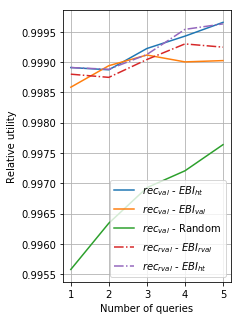

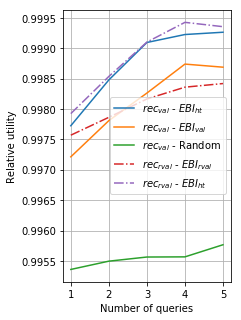

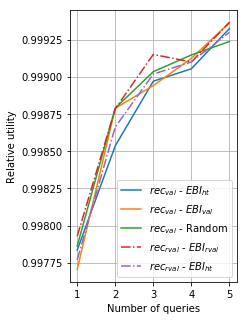

In [4]:
for filt in filters:
    fig = plt.figure(figsize=(3,5))
    ax = fig.subplots()
    for recom in recommenders:
        for voi in vois:
            there_is_combination_of_filt_recom_voi = False
            x_axis = [] 
            y_axis = [] 
            for index, row in result.iterrows():       
                if row["selector"] == voi and row["filter"] == filt and row['recommender'] == recom :
                    there_is_combination_of_filt_recom_voi = True
                    x_axis.append(row["query_n"])
                    y_axis.append(row["average_relative_utility"])
                    
            if there_is_combination_of_filt_recom_voi:
                indexLineStyle = list(filters).index(filt) + 1
                ax.plot(x_axis, y_axis, label=recName[recom.strip()] + " - " + voiName[voi.strip()], linestyle=recStyle[recom.strip()])
        
    # Title of the Fig. 
    filename = "relative_utility-fig-" + family + "-recommenders-voi" + filt  +"-"+ generator_prior + ".pdf"
    filename = filename.replace(" ", "-")
    ax.set(xlabel='Number of queries', xticks=queriesList, ylabel='Relative utility')
    ax.grid()
    ax.legend() # title="BIs"
    plt.ylim()
    plt.show()

    # Fig. generation
    fig.savefig(filename, pad_inches=0, bbox_inches='tight')